# Tarea 1
## Profesor: Dr. Esteban Vargas;  Alumno: Enrique Reyes
### 12/11/2020

El conjunto de datos a análizar contiene información sobre el precio de las casas de Ames en Iowa con 79 variables explicativas con las que realizaremos un modelo de regresión (Lineal, Ridge y Lasso), para posteriormente predecir el precio de las casas con otro conjunto de datos.

## 1. Carga de paquetes y datos

In [1]:
# Importamos las librerias
import pandas as pd # importar datos y analisis
import seaborn as sns # grafica de panel
import matplotlib.pyplot as plt # graficas 
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import math
import numpy as np
import statsmodels.api as sm  # resumen de regresión lineal simple 
from sklearn.linear_model import Lasso  #Regresión Lasso
from sklearn.linear_model import Ridge  # Regresión Ridge
from sklearn.linear_model import LinearRegression # Regresión Lineal
from sklearn.impute import KNNImputer #Imputación por vecinos más cercanos
from sklearn.preprocessing import StandardScaler #Datos escalados

In [2]:
# Cargamos los datos de entrenamiento
ent = pd.read_csv("train.csv")
# Visualizamos los primeros elementos de la base de datos
ent.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Cargamos los datos de prueba
pru = pd.read_csv("test.csv")
# Visualizamos los ultimos datos de la base
pru.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Análsis Exploratorio de Datos

In [4]:
# Resumen de variables numericas
Datos=ent.iloc[:,1:81]
summary = Datos.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


En este punto observamos que se descartan las variables en donde se almacenan datos de tipo caracter, es decir quitamos algunas variables de tipo categorico, pero aquellas variables categóricas que están indexadas con números son tomadas en cuenta como númericas aunque propiamente no sean así.
<p></p>
En este caso las variables "númericas" con valores faltantes serían:

- **LotFrontage**: Esta variable recopila los pies lineales de calle conectados a la propiedad, entonces los 459 valores faltantes podrían ser a causa de omisiones o a otra causa que no se explica en la descripción del conjunto de datos.
- **MasVnrArea**: Esta variable se relaciona con **MasVnrType**, dicha variable es de tipo categorica y tiene que ver con el revestimiento de mampostería. 
- **GarageYrBlt**: Esta variable esta relacionada con la variable **GarageType**, **GarageFinish**, **GarageQual** y **GarageCond**, dichas variables son categoricas; además de estar relacionadas con ***GarageCars** y **GarageArea**.


In [5]:
#Aislamos las variables relacionadas
MVA=Datos.loc[:,"MasVnrArea"]
MVT=Datos.loc[:,"MasVnrType"]
# Vemos que contiene la variable MVT
MVT.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [6]:
# verificamos que cuantas observaciones tenemos
MVT.value_counts().sum()

1452

In [7]:
# Buscamos los registros faltantes en MVA
MVA[MVA.isna()*1>0]

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [8]:
# Verificamos si los valores vacíos de MVA coinciden con los de MVT
MVT[MVA.isna()*1>0]

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

Efectivamente comparten los mismos valores faltantes, por lo tanto viendo la descripción de variables, **MasVnrType** no contempla la posibilidad de *NaN*, entonces estos son valores faltantes, pues si la casa no contara con un revestimiento de manpostería entonces la variable **MasVnrType** haría referencia a la clase *None* y *MasVnrArea* tomaría el valor de 0.

In [9]:
# Repetimos el proceso pero para las variables de Garage
Garage=Datos.loc[:,["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]]
# Vemos la descripcion de las variables de tipo objeto
Garage.describe(include=['object']).transpose()

,count,unique,top,freq
GarageType,1379,6,Attchd,870
GarageFinish,1379,3,Unf,605
GarageQual,1379,5,TA,1311
GarageCond,1379,5,TA,1326


In [10]:
# calculamos cuantas observaciones faltantes tenemos en las variables de tipo objeto en Garage
falta=Garage.isna().sum()
falta[falta>0]

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
# Vemos cuantos ceros tenemos en las variables de tipo numerico
Cero1=Garage.GarageCars==0
Cero1.sum()

81

In [12]:
Cero1=Garage.GarageArea==0
Cero1.sum()

81

Hasta este punto podemos pensar que los valores faltantes y los ceros en todas las variables de *Garage* coinciden, entonces visualizaremos la base completa para ver si es cierta esta suposición.

In [13]:
# Extraemos los valores faltantes de GarageType
Faltantes=Garage.GarageType[Garage.GarageType.isna()]
# Extraemos los indices
Renglones=Faltantes.index
Renglones

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [14]:
# Mostramos las primeras observaciones
Garage.iloc[Renglones,:].head(41)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [15]:
# Mostramos las ultimas
Garage.iloc[Renglones,:].tail(41)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
638,NaN,NaN,NaN,0,0,NaN,NaN
649,NaN,NaN,NaN,0,0,NaN,NaN
705,NaN,NaN,NaN,0,0,NaN,NaN
710,NaN,NaN,NaN,0,0,NaN,NaN
738,NaN,NaN,NaN,0,0,NaN,NaN
750,NaN,NaN,NaN,0,0,NaN,NaN
784,NaN,NaN,NaN,0,0,NaN,NaN
826,NaN,NaN,NaN,0,0,NaN,NaN
843,NaN,NaN,NaN,0,0,NaN,NaN
921,NaN,NaN,NaN,0,0,NaN,NaN


Revisando la descripción de las variables observamos que **GarageType**, **GarageFinish**, **GarageQual** y **GarageCond** aceptan dentro de sus categorías la opción *NA* y esto significa que la casa no dispone de un Garage; es decir en estas variables el NaN no significa no respuesta u omisión, sino que la casa no tiene Garage y por lo tanto estas variables no pueden ser cuantificadas en dichas observaciones.

Si fuesen valores faltantes, las variables **GarageArea** y **GarageCars** también registrarían valores faltantes en lugar de ceros.

Entonces para facilitar el análisis de regresión quitaremos las variables de tipo objeto y solo nos quedaremos con las variables "numéricas"

In [16]:
# Excluimos las variables de tipo objeto
DatosE=Datos.select_dtypes(exclude=['object'])
# Y como la variable GarageYrBlt no se puede imputar, la eliminaremos
DatosF=DatosE.drop("GarageYrBlt",1)
# Ahora imputaremos los valores faltantes de LotFrontage y MasVnrArea
imputer = KNNImputer(n_neighbors=2)
entrena=imputer.fit_transform(DatosF)
entrena=pd.DataFrame(entrena)
entrena.columns=list(DatosF.columns)
# Verificamos que ya no haya valores faltantes
Fent=entrena.isna().sum()
Fent[entrena.isna().sum()>0]

Series([], dtype: int64)

Ya no tenemos valores faltantes, entonces procederemos a limpiar la base de prueba bajo los mismos criterios.

In [17]:
# Quitamos las variables de tipo objeto
DatosP=pru.select_dtypes(exclude=['object'])
# Eliminamos las variables Id y GarageYrBlt
DatosP1=DatosP.drop(["Id","GarageYrBlt"],1)
# Vemos los valores faltantes
Fal=DatosP1.isna().sum()
Fal[DatosP1.isna().sum()>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
GarageArea        1
dtype: int64

Aquí, notamos que tenemos 8 variables de más con valores faltantes, y bajo el análisis hecho en con la base de entrenamiento las variables **LotFrontage**, **MasVnrArea**, **GarageCars** y **GarageArea** se pueden imputar sin ningún problema. Pero ahora tenemos que analizar que pasa con el resto de las variables.

Las variables **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF** están relacionadas ya que tienen que ver con las características del(de los) sótano(s) de la vivienda; y las variables **BsmtFullBath**, **BsmtHalfBath** tienen que ver con los baños de los sotanos.

In [18]:
# veamos que pasa con el sótano
sotano=pru.loc[:,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2",
                 "BsmtUnfSF","TotalBsmtSF"]]
# calculamos cuantas observaciones faltantes tenemos en las variables de tipo objeto en Garage
vac=sotano.isna().sum()
vac[vac>0]

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
dtype: int64

Cabe destacar que las variables categóricas tienen más valores faltantes que las variables numéricas, observemos que las variables **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2** sí admiten la clase *NA* en donde se afirma que no tenemos al menos un sótano y si dicha observación pertenece a la clase *NA* entonces **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF** y **TotalBsmtSF** tomarían el valor de 0. Es decir en este caso sí podemos imputar el valor faltante en **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF** sin ningún problema ya que es una omisión.

De igual forma, los valores faltantes en **BsmtFullBath**, **BsmtHalfBath** sí son valores perdidos o no capturados, por lo tanto también se podrán imputar estos valores.

In [19]:
# Ahora imputaremos los valores faltantes de las 10 variables
prueba=imputer.fit_transform(DatosP1)
prueba=pd.DataFrame(prueba)
prueba.columns=list(DatosP1.columns)
# Verificamos que ya no haya valores faltantes
Fpru=prueba.isna().sum()
Fpru[prueba.isna().sum()>0]

Series([], dtype: int64)

Hasta este punto ya tenemos las bases limpias, ahora verificaremos que las variables "numéricas" si sean de este tipo, para eso revisaremos la descripción de las variables.

- **MSSubClass** no es numérica ya que esta variable almacena el tipo de vivienda involucrada en la venta.

Entonces eliminaremos de ambas bases esta variable.

In [20]:
# Base limpia de entrenamiento
Entrena=entrena.drop("MSSubClass",1)
# Procedemos a estandarizar a las variables numericas ya que toman valores muy diferentes
scaler = StandardScaler()
EntrenaS=scaler.fit_transform(Entrena.values)
EntrenaS=pd.DataFrame(EntrenaS)
EntrenaS.columns=list(Entrena.columns)
EntrenaS

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-0.236086,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.507931,0.575425,-0.288653,-0.944591,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,0.384819,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574404,1.171992,-0.288653,-0.641228,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-0.111905,0.073480,0.651479,-0.517200,0.984752,0.830215,0.320179,0.092907,-0.288653,-0.301643,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-0.443054,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574404,-0.499274,-0.288653,-0.061670,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.550394,0.375148,1.374795,-0.517200,0.951632,0.733308,1.358337,0.463568,-0.288653,-0.174865,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.360266,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574404,-0.973018,-0.288653,0.873321,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,0.591787,0.266407,-0.071836,0.381743,0.222975,0.151865,0.082728,0.759659,0.722112,0.049262,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,-0.194692,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574404,-0.369871,-0.288653,0.701265,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,-0.111905,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574404,-0.865548,6.092188,-1.284176,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [21]:
# Base limpia de prueba
Prueba=prueba.drop("MSSubClass",1)
# Escalamos la base
PruebaS=scaler.fit_transform(Prueba.values)
PruebaS=pd.DataFrame(PruebaS)
PruebaS.columns=list(Prueba.columns)
PruebaS

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.474891,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570371,0.063936,0.517537,-0.651034,...,1.185826,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905
1,0.519791,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.039297,1.063714,-0.297689,-0.339866,...,-0.741314,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905
2,0.205494,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570371,0.773668,-0.297689,-0.955338,...,0.042451,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905
3,0.385092,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.457469,0.358376,-0.297689,-0.527482,...,-0.012874,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905
4,-1.186389,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570371,-0.386513,-0.297689,1.058100,...,0.153100,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.174177,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570371,-0.964407,-0.297689,-0.019547,...,-2.179754,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-1.359958
1455,-2.174177,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570371,-0.410684,-0.297689,-0.596122,...,-0.861184,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,-1.359958
1456,4.066848,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570371,1.725105,-0.297689,-1.268793,...,0.475827,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,-1.359958
1457,-0.333299,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570371,-0.223912,-0.297689,0.046805,...,-2.179754,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-1.359958


## 3. Modelos de regresión
### 3.1. Regresión Lineal Múltiple

Una vez limpias las bases y con los datos ya estandarizados para mitigar las diferentes mediciones que tiene cada variable, entonces, con la regresión lineal simple lo que buscamos es encontrar el "mejor" modelo bajo nuestro aprendizaje y en donde nosotros iremos descartando variables bajo ciertas consideraciones.

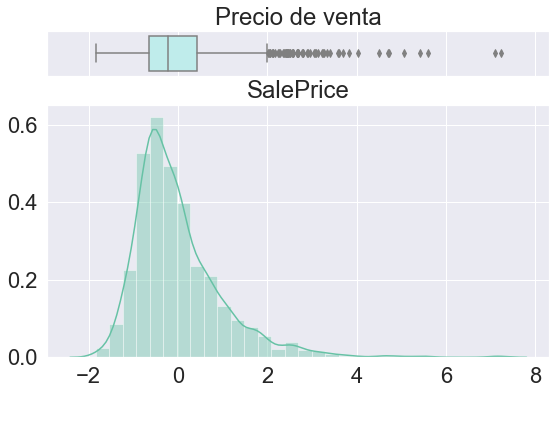

In [22]:
# Veamos el comportamiento de la varianble respuesta
Y = EntrenaS.iloc[:,34]

# Definimos una función para la visualización del histograma, la densidad y el boxplot de la variable respuesta
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,6), 
                      bins = None, saturation = 0.75, color1 = None, color2 = None):

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2, saturation=saturation, color=color1)
    sns.distplot(data, ax=ax_hist2, bins=bins, color=color2) if bins else sns.distplot(data, ax=ax_hist2, color=color2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()

# aplicamos la funcion
histogram_boxplot(Y, bins = 30, title = 'Precio de venta', xlabel = ' ', saturation = 0.8, 
                  color1 = sns.color_palette("pastel")[9], color2 = sns.color_palette("Set2")[0])

In [23]:
# ahora veremos las correlaciones entre todas las variables para ver cuales considerariamos en un ajuste linea
corr1 = EntrenaS.corr()
corr1.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

Un criterio inicial para elegir a las covariables que pueden explicar a los precios de las casas en forma lineal, sería elegir a las variables con mayor correlación lineal con respecto a SalePrice, aunque debemos considerar que estas variables pueden estar correlacionadas entre sí y esto causaría problemas de multicolinealidad.
<p></p>
Entonces las variables a considerar serían:
<ul>
<li> OverallQual ( $\rho=0.79$ ) </li>
<li> GrLivArea ( $\rho=0.71$ ) </li>
<li> GarageCars ( $\rho=0.64$ ) </li>
<li> GarageArea ( $\rho=0.62$ ) </li>
<li> TotalBsmtSF ( $\rho=0.61$ ) </li>
<li> 1stFlrSF ( $\rho=0.61$ ) </li>
<li> FullBath ( $\rho=0.56$ ) </li>
<li> TotRmsAbvGrd ( $\rho=0.53$ ) </li>
<li> YearBuilt ( $\rho=0.52$ ) </li>
<li> YearRemodAdd ( $\rho=0.51$ ) </li>
<li> MasVnrArea ( $\rho=0.48$ ) </li>
<li> Fireplaces ( $\rho=0.47$ ) </li>
</ul>

In [24]:
Posibles=EntrenaS.loc[:,['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
            'TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','SalePrice']]
Posibles.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,SalePrice
OverallQual,1.00,0.59,0.60,0.56,0.54,0.48,0.55,0.43,0.57,0.55,0.41,0.40,0.79
GrLivArea,0.59,1.00,0.47,0.47,0.45,0.57,0.63,0.83,0.20,0.29,0.39,0.46,0.71
GarageCars,0.60,0.47,1.00,0.88,0.43,0.44,0.47,0.36,0.54,0.42,0.37,0.30,0.64
GarageArea,0.56,0.47,0.88,1.00,0.49,0.49,0.41,0.34,0.48,0.37,0.37,0.27,0.62
TotalBsmtSF,0.54,0.45,0.43,0.49,1.00,0.82,0.32,0.29,0.39,0.29,0.37,0.34,0.61
1stFlrSF,0.48,0.57,0.44,0.49,0.82,1.00,0.38,0.41,0.28,0.24,0.35,0.41,0.61
FullBath,0.55,0.63,0.47,0.41,0.32,0.38,1.00,0.55,0.47,0.44,0.28,0.24,0.56
TotRmsAbvGrd,0.43,0.83,0.36,0.34,0.29,0.41,0.55,1.00,0.10,0.19,0.28,0.33,0.53
YearBuilt,0.57,0.20,0.54,0.48,0.39,0.28,0.47,0.10,1.00,0.59,0.31,0.15,0.52
YearRemodAdd,0.55,0.29,0.42,0.37,0.29,0.24,0.44,0.19,0.59,1.00,0.18,0.11,0.51


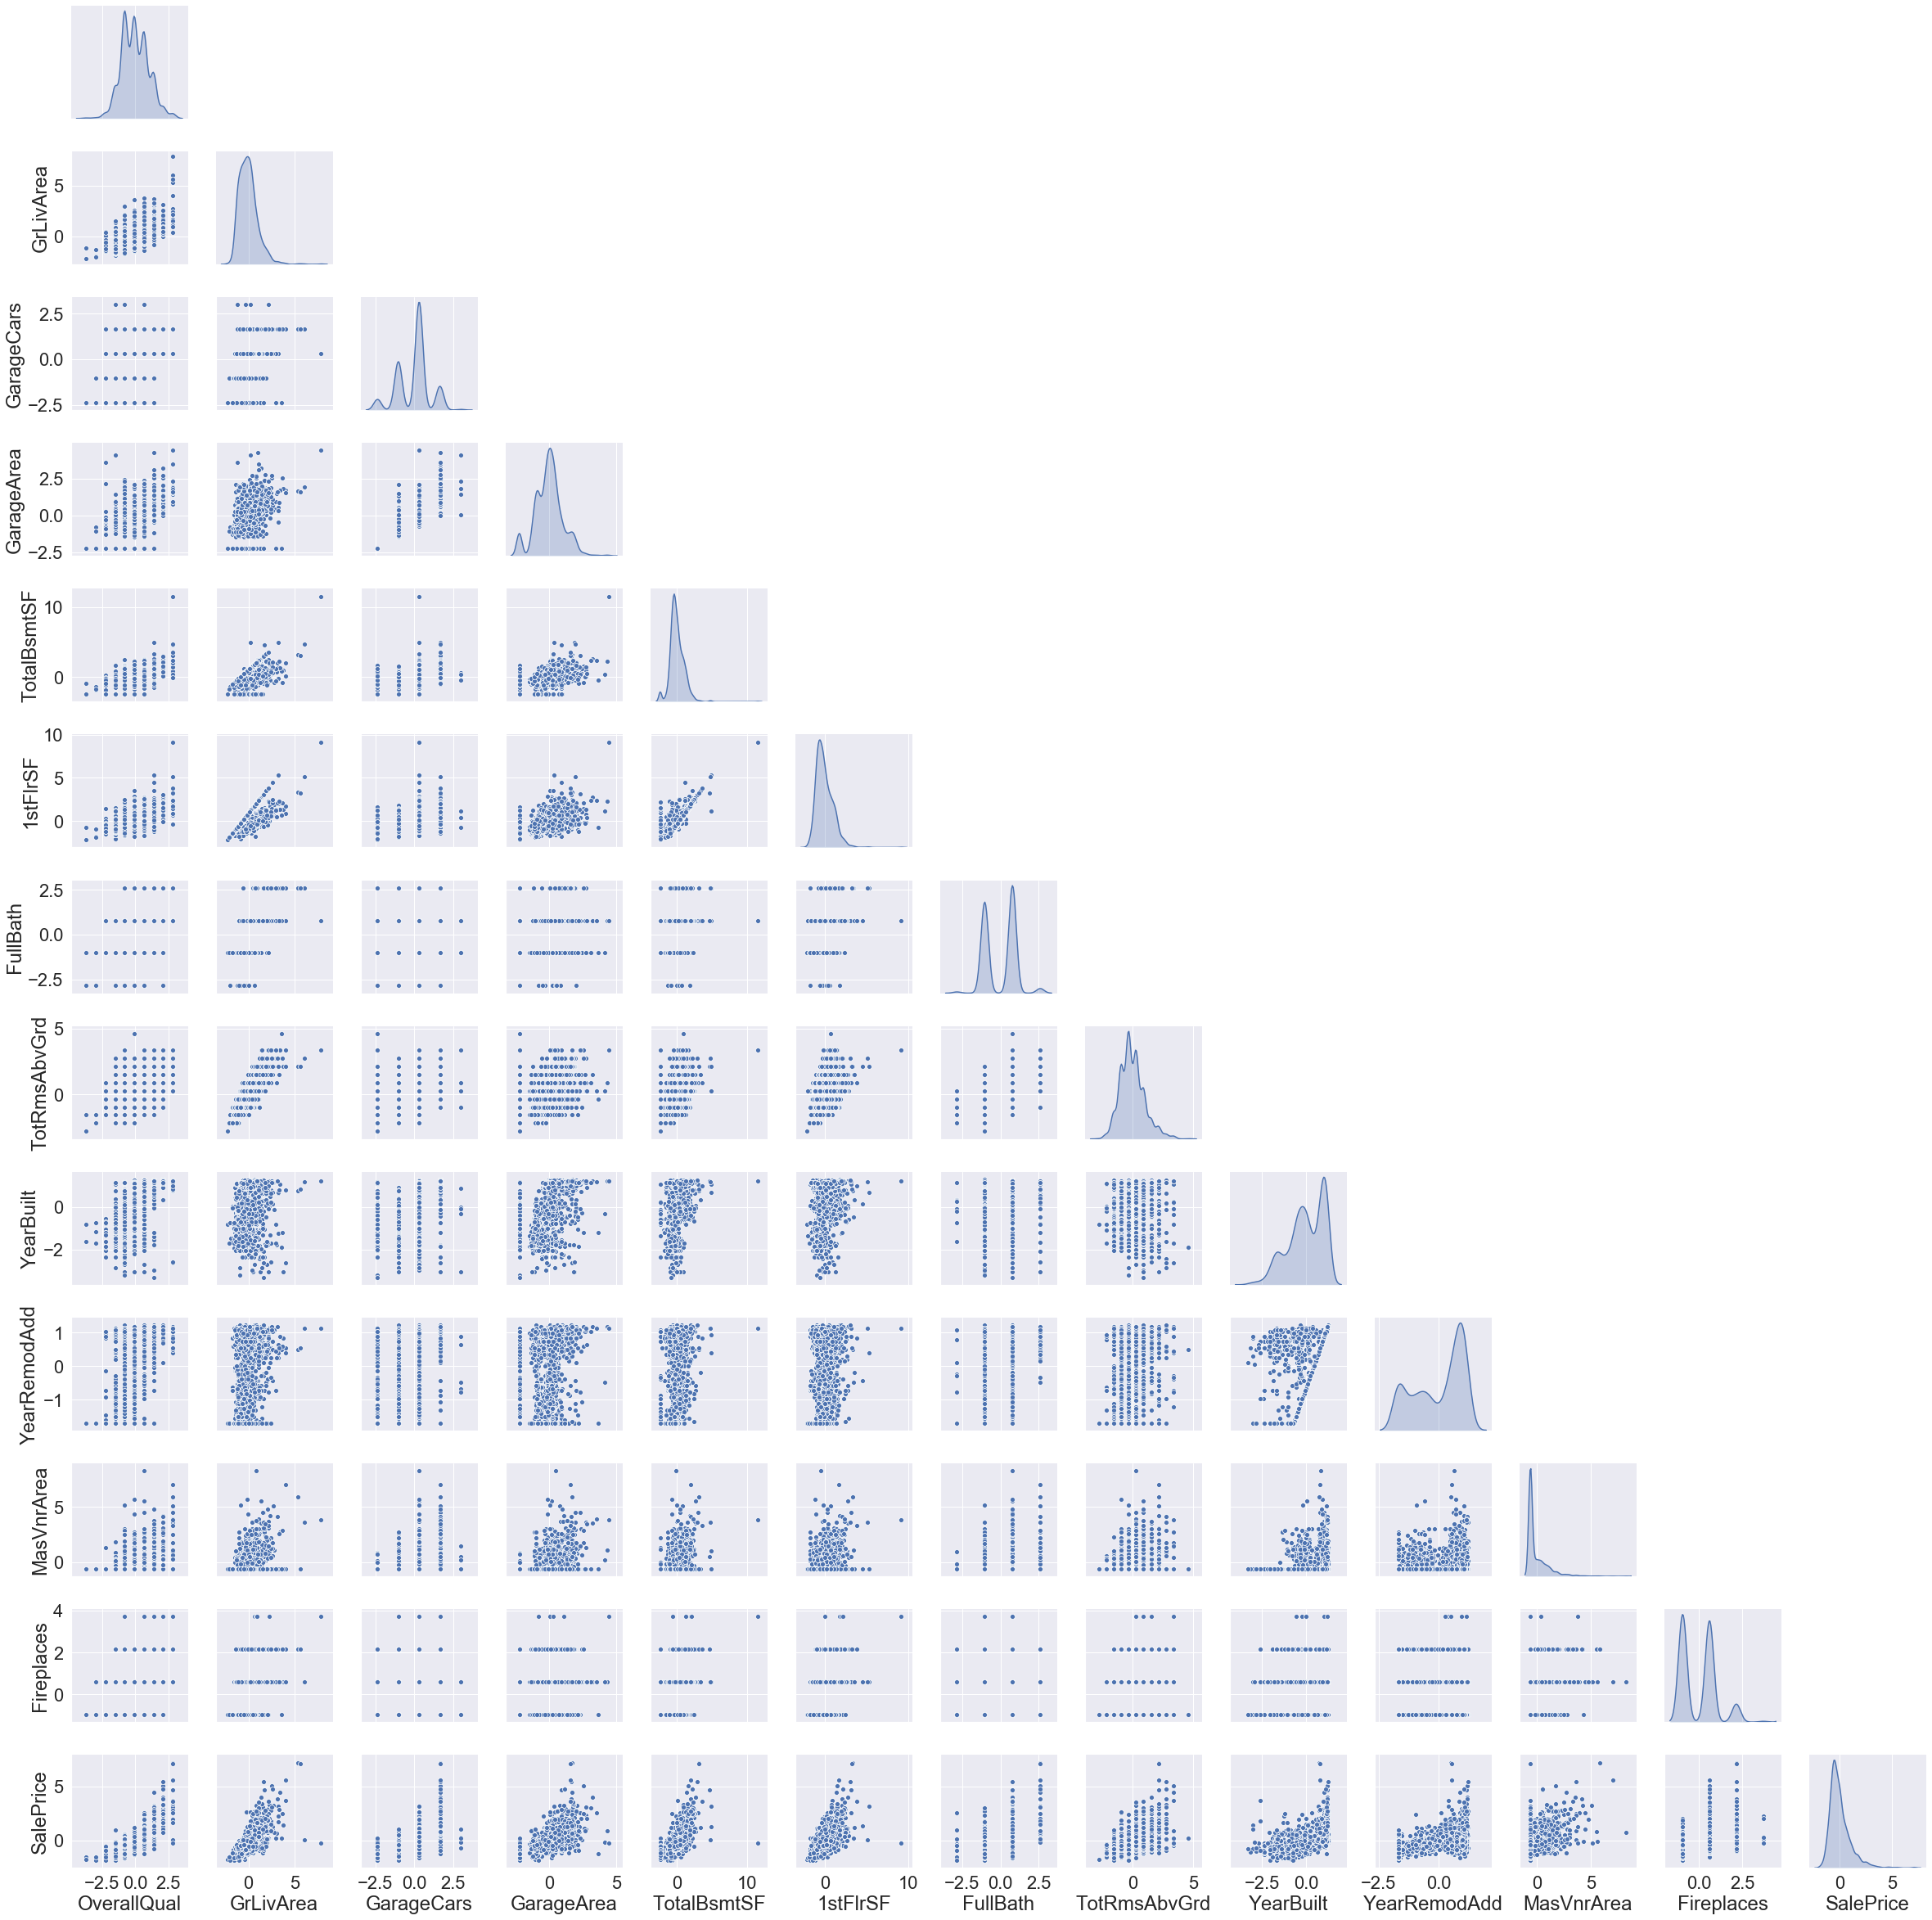

In [25]:
# Vamos a hacer una grafica de panel para ver como se comportan las variables explicativas
# con respecto a los precios de venta de las casas
sns.pairplot(Posibles, diag_kind = 'kde', corner=True)

Las variables **Overall**, **GrLivArea**, **GarageCars**, **TotalBsmtSF**, **FullBath**, **YearBuilt**, **MasVnrArea**, **Fireplaces** son las variables que individualmente parecen describir de mejor forma a la variable explicativa **SalePrice**; descartamos a las variables **GarageArea**, **1stFlrSF**, **TotRmsAbvGrd**, **YearRemodAdd** porque estas variables tienen una relación correlación más fuerte con otras variables que con la variable respuesta, entonces para evitar problemas de multicolinealidad, decidimos descartar estas variables para el modelo de regresión lineal multiple.

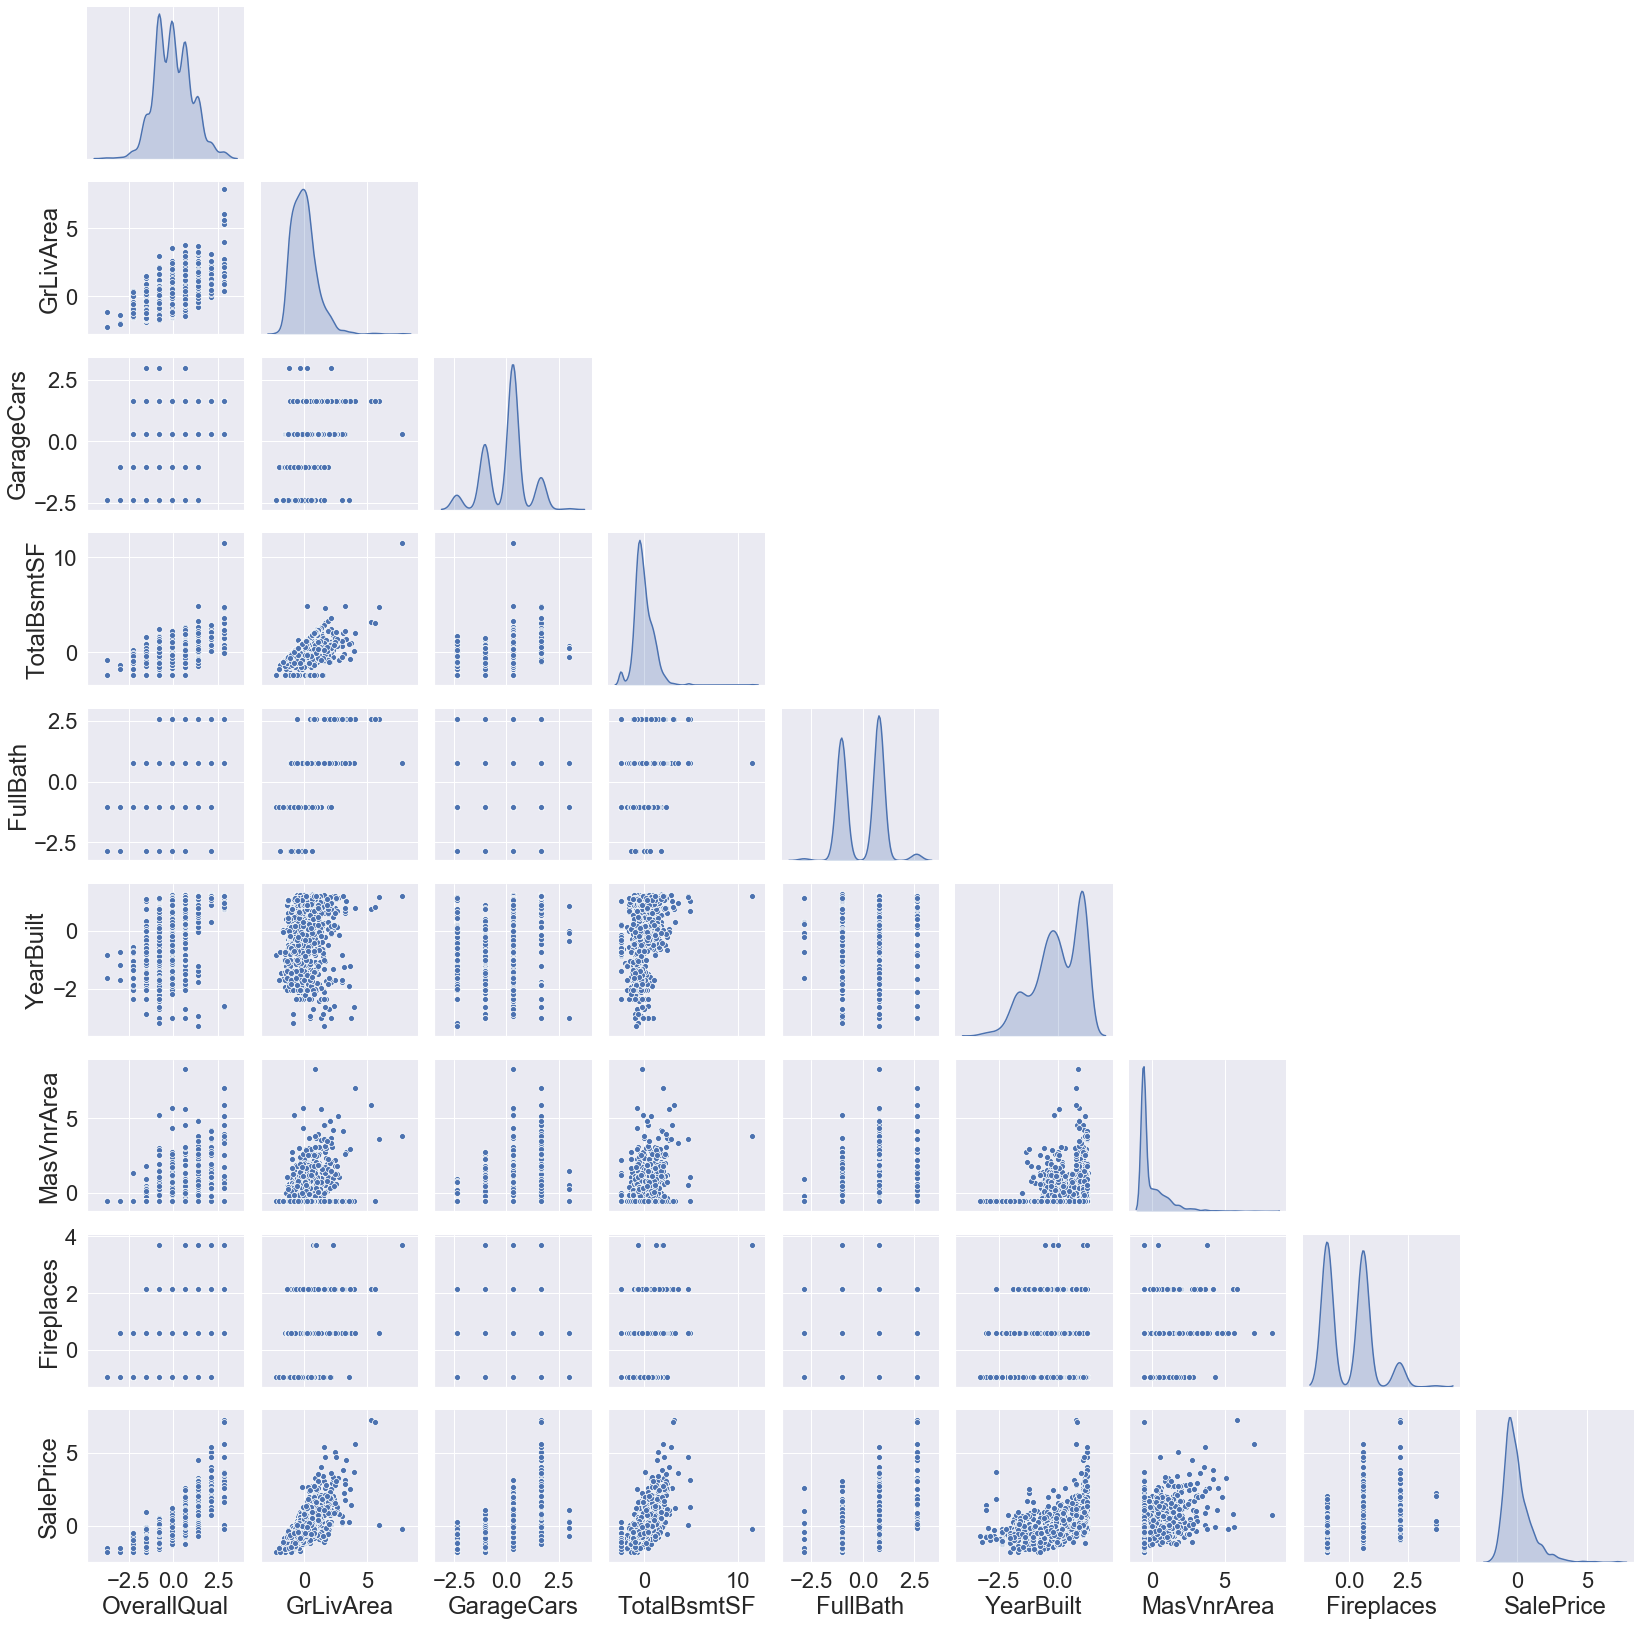

In [26]:
# visualizaremos la seleccion de variables
datnum=EntrenaS.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','MasVnrArea','Fireplaces']]
datn1=pd.concat([datnum.reset_index(drop=True), Y], axis=1)
sns.pairplot(datn1, diag_kind = 'kde', corner=True)

In [27]:
#La matriz de correlación.
corr=datn1.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,SalePrice
OverallQual,1.00,0.59,0.60,0.54,0.55,0.57,0.41,0.40,0.79
GrLivArea,0.59,1.00,0.47,0.45,0.63,0.20,0.39,0.46,0.71
GarageCars,0.60,0.47,1.00,0.43,0.47,0.54,0.37,0.30,0.64
TotalBsmtSF,0.54,0.45,0.43,1.00,0.32,0.39,0.37,0.34,0.61
FullBath,0.55,0.63,0.47,0.32,1.00,0.47,0.28,0.24,0.56
YearBuilt,0.57,0.20,0.54,0.39,0.47,1.00,0.31,0.15,0.52
MasVnrArea,0.41,0.39,0.37,0.37,0.28,0.31,1.00,0.25,0.48
Fireplaces,0.40,0.46,0.30,0.34,0.24,0.15,0.25,1.00,0.47
SalePrice,0.79,0.71,0.64,0.61,0.56,0.52,0.48,0.47,1.00


In [28]:
# Ajustamos el modelo de regresión
lineal = LinearRegression(fit_intercept=True, normalize=False)
# Regresión y ~ x
lineal.fit(datnum,Y)
# Coeficientes del intercepto
lineal.intercept_

-4.811563396392693e-17

In [29]:
# coeficientes de regresion
lineal.coef_

array([ 0.33721684,  0.31334934,  0.12765141,  0.14493541, -0.02208033,
        0.12054827,  0.0679867 ,  0.07143647])

In [30]:
# Coeficiente de determinación
lineal.score(datnum, Y)

0.7761064282689057

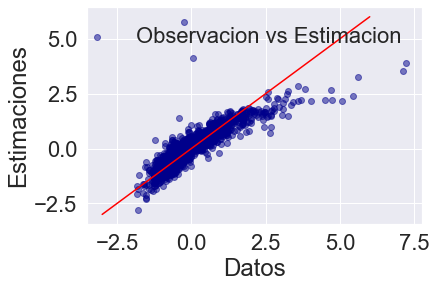

In [31]:
# Valores predichos con los datos de entrenamiento
yp=lineal.predict(datnum)
# valores del precio de venta
ym = Y
# Grafica
plt.scatter(ym, yp, c='darkblue',alpha=0.5, label='Observacion vs Estimacion')
plt.plot([-3, 6], [-3, 6], color='red')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()

En el caso ideal todos los valores deberían estar sobre la recta, pero están dispersos entre la linea, además de que los puntos parecen tener un comportamiento curvo en vez de lineal, por otra partecon forme aumenta el precio de la casa, el modelo parece estar subestimandolo.

In [32]:
# Ahora veamos un resumen más detallado sobre nuestro modelo de regresión
x = sm.add_constant(datnum)
model = sm.OLS(Y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     628.7
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        05:03:47   Log-Likelihood:                -979.14
No. Observations:                1460   AIC:                             1976.
Df Residuals:                    1451   BIC:                             2024.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.301e-16      0.012   1.05e-14      

El modelo parece que se ajusta bien, en el sentido de que estas variables aparentemente sí explican a la variable respuesta en forma lineal (Esto lo determinamos del estadístico F con su *p-value* asociado), pero tiene algunos detalles, en primer lugar, la variable FullBath tiene un *p-value* superior al 0.05 y por ende su intervalo de confianza al 95% de confianza contiene al cero, por lo tanto esta variable puede ser eliminada, además el intercepto tiene un coeficiente estimado de casi cero con un error estandar relativamentente grande, por ende tiene un *p-value* grande y su intervalo de confianza contiene al 0 entonces el intercepto también es candidato a salir.

In [33]:
# Caso 1) Quitamos el intercepto
model1 = sm.OLS(Y, datnum)
results1 = model1.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              629.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        05:03:47   Log-Likelihood:                         -979.14
No. Observations:                1460   AIC:                                      1974.
Df Residuals:                    1452   BIC:                                      2017.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [34]:
# Caso 2) Quitamos la variable FullBath
x1 = sm.add_constant(datnum.drop("FullBath",1))
model2 = sm.OLS(Y, x1)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     718.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        05:03:48   Log-Likelihood:                -979.88
No. Observations:                1460   AIC:                             1976.
Df Residuals:                    1452   BIC:                             2018.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.301e-16      0.012   1.05e-14      

In [35]:
# Caso 3) Quitamos el intercepto y la variable FullBath
x2=datnum.drop("FullBath",1)
model3 = sm.OLS(Y, x2)
results3 = model3.fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              718.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        05:03:48   Log-Likelihood:                         -979.88
No. Observations:                1460   AIC:                                      1974.
Df Residuals:                    1453   BIC:                                      2011.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Si usamos el **AIC** como criterio para determinar que modelo es mejor tendríamos que el mejor modelo sería el modelo que no considera el intercepto ni la variable **FullBath**, con el **BIC** se elige al mismo mdelo, por lo tanto nuestro modelo de regresión lineal multiple estaría dado por:
\begin{eqnarray*}
Y&=&\beta_1 X_1+\beta_2 X_2+\beta_3 X_3+\beta_4 X_4+\beta_5 X_5+\beta_6 X_6+\beta_7 X_7+\epsilon\\
\hat{SalePrice}&=& 0.3355 \cdot OverallQual + 0.3001 \cdot GrLivArea + 0.1267 \cdot GarageCars\\
& &+ 0.1471 \cdot TotalBsmtSF + 0.1128 \cdot YearBuilt + 0.0693 \cdot MasVnrArea \\
& &+0.0732\cdot Fireplaces
\end{eqnarray*}

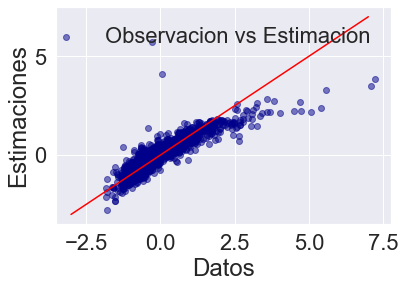

In [36]:
# Ajustamos el modelo de regresión
lineal1 = LinearRegression(fit_intercept=False)
# base final
datosnum = datnum.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','MasVnrArea','Fireplaces']]
lineal1.fit(datosnum,Y)
# Valores predichos con los datos de entrenamiento
y1=lineal1.predict(datosnum)
# Grafica
plt.scatter(ym, y1, c='darkblue',alpha=0.5, label='Observacion vs Estimacion')
plt.plot([-3,7], [-3,7], color='red')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()

El modelo mejoro un poco, pero como persite el comportamiento curvo, tal vez podríamos pensar en una transformación como el logaritmo natural sobre el precio de venta.

In [37]:
# logaritmo de los precios
lnSP=np.log(Entrena.iloc[:,34])
lnSP=pd.DataFrame(lnSP)
lnSPS=scaler.fit_transform(lnSP)
lnSPS=pd.DataFrame(lnSPS)
lnSPS.columns=list(["lnSalePrice"])
Yln=lnSPS
# Caso 4) Tomamos el "mejor" modelo y lo aplicamos a la variable transformada
model4 = sm.OLS(Yln, x2)
results4 = model4.fit()
print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:            lnSalePrice   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              949.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        05:03:49   Log-Likelihood:                         -817.38
No. Observations:                1460   AIC:                                      1649.
Df Residuals:                    1453   BIC:                                      1686.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [38]:
# Quitando la variable de MasVnrArea
x3=x2.drop("MasVnrArea",1)
model5 = sm.OLS(Yln, x3)
results5 = model5.fit()
print(results5.summary())

                                 OLS Regression Results                                
Dep. Variable:            lnSalePrice   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              1108.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        05:03:49   Log-Likelihood:                         -817.67
No. Observations:                1460   AIC:                                      1647.
Df Residuals:                    1454   BIC:                                      1679.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Este modelo parece ser que sí mejora el rendimiento del modelo de regresión ya que tiene el **AIC** y el **BIC** más pequeños, de esta forma el modelo definitivo estaría dado como:
\begin{eqnarray*}
\hat{ln(SalePrice)}&=& 0.3376 \cdot OverallQual + 0.2839 \cdot GrLivArea + 0.1587 \cdot GarageCars\\
& &+ 0.1225 \cdot TotalBsmtSF + 0.1877 \cdot YearBuilt +0.1074\cdot Fireplaces
\end{eqnarray*}

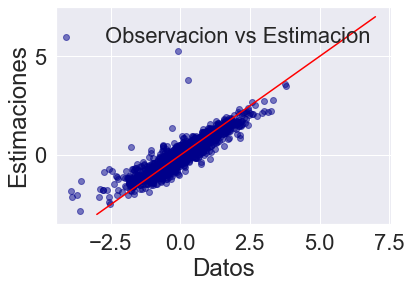

In [39]:
# base final
datosln = datnum.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Fireplaces']]
lineal1.fit(datosln,Yln)
# Valores predichos con los datos de entrenamiento
yln1=lineal1.predict(datosln)
# Grafica
plt.scatter(Yln, yln1, c='darkblue',alpha=0.5, label='Observacion vs Estimacion')
plt.plot([-3,7], [-3,7], color='red')
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimaciones')
plt.show()

Efectivamente, estra transformación mejoró al modelo de regresión, pues las estimaciones y las observaciones tienen un comportamiento más lineal (en comparación del modelo que estima solo a los precios de venta).

### 3.2 Regresión Lasso
En este modelo de regresión le dejaremos al programa conforme el algoritmo de regresión Lasso que determine al mejor modelo.

In [40]:
# Quitamos a la base EntrenaS la variable explicativa
datosnum1=EntrenaS.drop("SalePrice",1)
datosnum1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.236086,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.507931,0.575425,-0.288653,-0.944591,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.384819,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574404,1.171992,-0.288653,-0.641228,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.111905,0.073480,0.651479,-0.517200,0.984752,0.830215,0.320179,0.092907,-0.288653,-0.301643,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.443054,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574404,-0.499274,-0.288653,-0.061670,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.550394,0.375148,1.374795,-0.517200,0.951632,0.733308,1.358337,0.463568,-0.288653,-0.174865,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [41]:
# Ajuste por Lasso
lasso_model1 = Lasso(alpha=0.18, max_iter=1e6)
lasso_model1.fit(datosnum1,Y)
lasso_model1.coef_

array([ 0.        ,  0.        ,  0.37867503,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00156224,  0.        , -0.        ,
        0.07110626,  0.02368112,  0.        , -0.        ,  0.21472252,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.07927845,  0.01327474,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ])

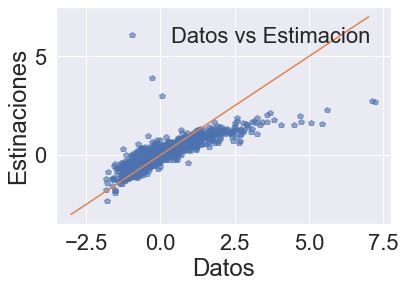

In [42]:
# Grafica del modelo contra los valores
YLp=lasso_model1.predict(datosnum1)
plt.plot(Y, YLp,'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estinaciones')
plt.show()

In [43]:
# Ajuste por Lasso
lasso_model2 = Lasso(alpha=0.12, max_iter=1e6)
lasso_model2.fit(datosnum1,Y)
lasso_model2.coef_

array([ 0.        ,  0.        ,  0.37027806,  0.        ,  0.02515784,
        0.01873944,  0.01318904,  0.0391274 ,  0.        , -0.        ,
        0.06681904,  0.03483571,  0.        , -0.        ,  0.24589101,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.09074598,  0.01477312,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ])

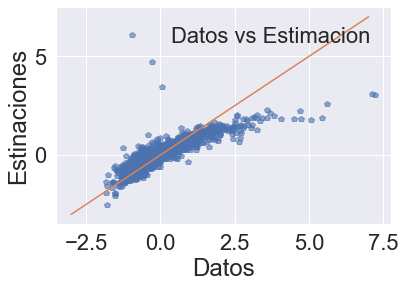

In [44]:
# Grafica del modelo contra los valores
YLp1=lasso_model2.predict(datosnum1)
plt.plot(Y, YLp1,'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estinaciones')
plt.show()

In [45]:
# Ajuste por Lasso
lasso_model3 = Lasso(alpha=0.06, max_iter=1e6)
lasso_model3.fit(datosnum1,Y)
lasso_model3.coef_

array([ 0.        ,  0.02200062,  0.35128728,  0.        ,  0.04378796,
        0.05549635,  0.04139234,  0.06468957,  0.        , -0.        ,
        0.06260208,  0.0371572 ,  0.        , -0.        ,  0.2609262 ,
        0.0041917 , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00163781,  0.        ,  0.02712613,  0.09401285,  0.0200433 ,
        0.01569501,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ])

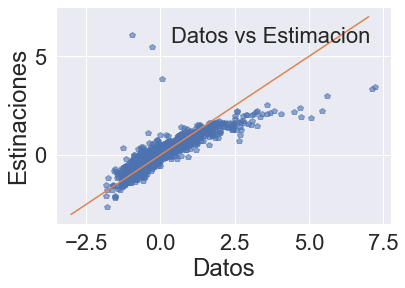

In [46]:
# Grafica del modelo contra los valores
YLp2=lasso_model3.predict(datosnum1)
plt.plot(Y, YLp2,'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estinaciones')
plt.show()

Como podemos ver, el modelo Lasso pese a involucrar a todas las variables de la base de datos, no hace significativas a todas, varios de los parámetros estimados son practicamente 0, de hecho con forme fuimos variando $\alpha$ los puntos fueron variando en su compartamiento, es decir en vez de tener 3 puntos colineales poco a poco se fueron acomodando en una mejor a algo similar a lo mostrado en el modelo de regresión. De esta forma el modelo quedaría expresado de la siguiente forma:
\begin{eqnarray*}
\hat{SalePrice}&=& 0.02200062 \cdot LotArea + 0.35128728 \cdot OverallQual + 0.04378796 \cdot YearBuilt \\
& &+0.05549635 \cdot YearRemodAdd +  0.04139234 \cdot MasVnrArea +  0.06468957 \cdot BsmtFinSF1 \\
& &+0.06260208 \cdot TotalBsmtSF +  0.0371572 \cdot 1stFlrSF + 0.2609262 \cdot GrLivArea\\
& &+0.0041917 \cdot BsmtFullBath -0.00163781 \cdot KitchenAbvGr +  0.02712613 \cdot Fireplaces \\
& &+0.09401285 \cdot GarageCars + 0.0200433 \cdot GarageArea + 0.01569501 \cdot WoodDeckSF
\end{eqnarray*}

veamos que pasa pero si ajustamos el logaritmo del precio de las casas

In [47]:
# Ajuste por Lasso
lasso_model3.fit(datosnum1,Yln)
lasso_model3.coef_

array([ 0.00190872,  0.01851237,  0.32663158,  0.04122725,  0.12979763,
        0.0736351 ,  0.        ,  0.02445863,  0.        , -0.        ,
        0.06769001,  0.01895405,  0.        , -0.        ,  0.24949556,
        0.02508904,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.0669849 ,  0.12983471,  0.01391567,
        0.01134252,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

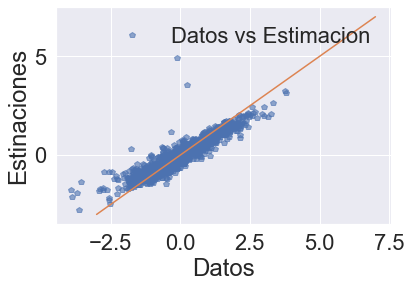

In [48]:
# Grafica del modelo contra los valores
YLp3=lasso_model3.predict(datosnum1)
plt.plot(Yln, YLp3,'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estinaciones')
plt.show()

El modelo mejoró, pero notamos que a precios bajos sobre estimamos el valor de la casa y en precios altos subestimamos el valore real de venta.

### 3.3 Regresión Ridge
Al igual que en el caso anterior, vamos meter la base de datos en su totalidad y veamos si el modelo es capaz de discernir que variables son óptimas bajo un cierto $\alpha$

In [49]:
# Regresion Ridge
ridge_model1 = Ridge(alpha=0.5)
ridge_model1.fit(datosnum1, Y) 
ridge_model1.coef_

array([ 2.21319010e-02,  5.28910827e-02,  2.89240101e-01,  6.47027325e-02,
        1.14625724e-01,  4.55822626e-02,  7.04473034e-02,  5.55155010e-02,
       -2.82908082e-03,  3.41608002e-03,  6.01168487e-02,  1.14511304e-01,
        9.27622325e-02, -3.44838940e-03,  1.60984786e-01,  5.17525684e-02,
        1.05568925e-03,  2.22746768e-02, -1.04675068e-02, -9.43984257e-02,
       -6.68538706e-02,  1.20470801e-01,  2.65798827e-02,  9.88962565e-02,
        5.28567999e-03,  4.09995050e-02, -1.51486780e-04,  9.20163939e-03,
        7.81623086e-03,  3.93348504e-02, -2.09218954e-02, -2.87951850e-03,
        1.49226560e-03, -1.01957792e-02])

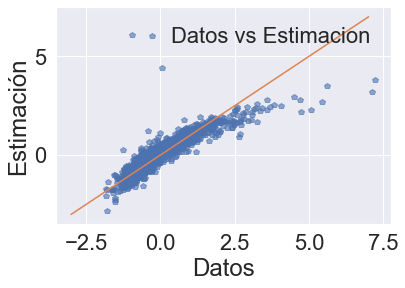

In [50]:
plt.plot(Y, ridge_model1.predict(datosnum1),'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimación')
plt.show()

El ajuste parace ser bueno pese a considerar a todas las variables, pero es probable que algunas no sean estadísticamente significativas y por ende no varie mucho el modelo final bajo diferentes $\alpha$. Así que por último ajustaremos el modelo de Ridge pero con el logaritmo de los precios.

In [51]:
# Ajuste con el logaritmo
ridge_model1.fit(datosnum1, Yln) 
ridge_model1.coef_

array([[ 0.02726166,  0.04511915,  0.28328956,  0.13793501,  0.21156883,
         0.05782393, -0.00131855,  0.03818807,  0.00888941,  0.01286625,
         0.05592982,  0.09813866,  0.05753378,  0.00372117,  0.12033801,
         0.07607471,  0.0089771 ,  0.05167767,  0.02880806,  0.00304342,
        -0.05089377,  0.07258877,  0.07150994,  0.12613061,  0.01668902,
         0.03961015, -0.0054737 ,  0.02568249,  0.01594224,  0.0514263 ,
        -0.04271162, -0.00338403,  0.00509619, -0.02195912]])

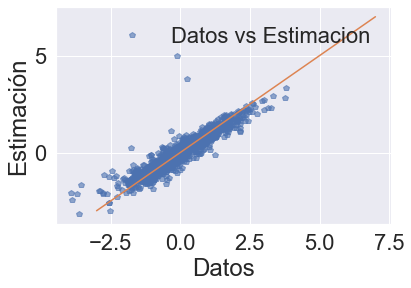

In [52]:
plt.plot(Yln, ridge_model1.predict(datosnum1),'p',alpha=0.6, label='Datos vs Estimacion')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Datos')
plt.ylabel('Estimación')
plt.show()

El modelo de Ridge se ve mejor con el logaritmo que con los precios de venta de las casas por si solos, entonces en apariencia este modelo será mejor, pero sigue teniendo problemas de subestimación y sobreestimación, pero la nive de puntos se ve relativamente homogenea.

### 3.4 Comparación de modelos
Por último graficaremos como se ven las Y ajustadas de los 6 modelos finales para ver que tan diferentes son las predicciones en esta etapa de prueba.

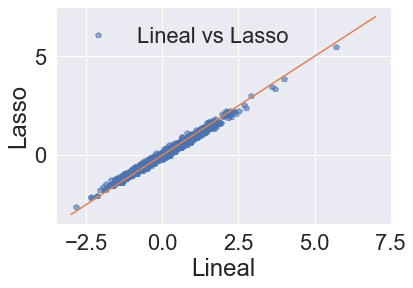

In [66]:
# Precios de venta
lineal1.fit(datosln,Y)
yrlm=lineal1.predict(datosln)
lasso_model3.fit(datosnum1,Y)
yrl=lasso_model3.predict(datosnum1)
ridge_model1.fit(datosnum1, Y) 
yrr=ridge_model1.predict(datosnum1)
## Regresión lineal vs Regresión Lasso
plt.plot(yrlm, yrl,'p',alpha=0.6, label='Lineal vs Lasso')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Lineal')
plt.ylabel('Lasso')
plt.show()

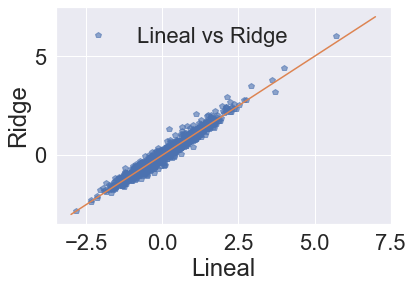

In [67]:
## Regresión lineal vs Regresión Ridge
plt.plot(yrlm, yrr,'p',alpha=0.6, label='Lineal vs Ridge')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Lineal')
plt.ylabel('Ridge')
plt.show()

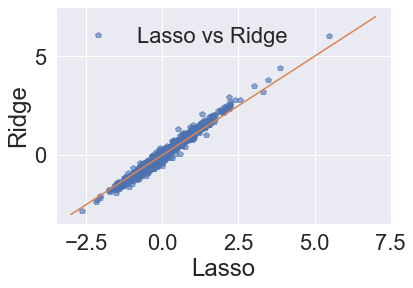

In [68]:
## Regresión Lasso vs Regresión Ridge
plt.plot(yrl, yrr,'p',alpha=0.6, label='Lasso vs Ridge')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Lasso')
plt.ylabel('Ridge')
plt.show()

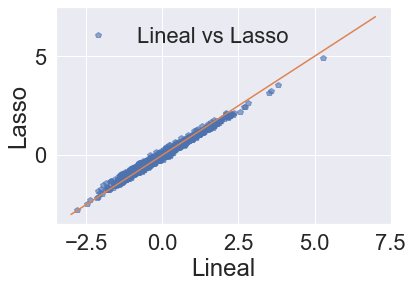

In [69]:
# Logaritmo de los precios de venta
lineal1.fit(datosln,Yln)
yrlm1=lineal1.predict(datosln)
lasso_model3.fit(datosnum1,Yln)
yrl1=lasso_model3.predict(datosnum1)
ridge_model1.fit(datosnum1, Yln) 
yrr1=ridge_model1.predict(datosnum1)
## Regresión lineal vs Regresión Lasso
plt.plot(yrlm1, yrl1,'p',alpha=0.6, label='Lineal vs Lasso')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Lineal')
plt.ylabel('Lasso')
plt.show()

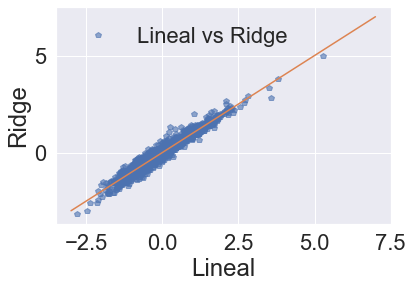

In [70]:
## Regresión lineal vs Regresión Ridge
plt.plot(yrlm1, yrr1,'p',alpha=0.6, label='Lineal vs Ridge')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Lineal')
plt.ylabel('Ridge')
plt.show()

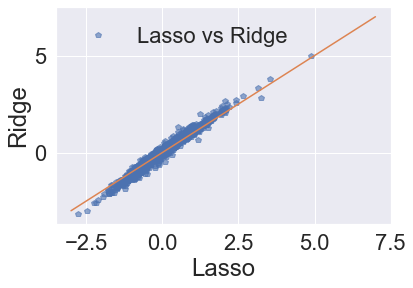

In [71]:
## Regresión Lasso vs Regresión Ridge
plt.plot(yrl1, yrr1,'p',alpha=0.6, label='Lasso vs Ridge')
plt.plot([-3, 7], [-3, 7])
plt.legend(loc='best', frameon=False)
plt.xlabel('Lasso')
plt.ylabel('Ridge')
plt.show()

**Conclusión**: Los 6 modelos planteados son relativamente buenos, aunque los modelos más parecidos son *Lineal* y *Ridge* pese a estar construidos con diferentes variables (Lineal considera menos variables y Ridg toma en cuenta a todas). Los más discrepantes serían *Lasso* y *Ridge*, esto tal vez sea consecuencia de que el modelo Lasso es un poco más sencible con respecto al $\alpha$ seleccionado y en este conjunto de datos.

## 4. Predicción
Ahora pasaremos a la etapa de preuba para ver si nuestro modelo de regresión es robusto y puede generalizar resultados.

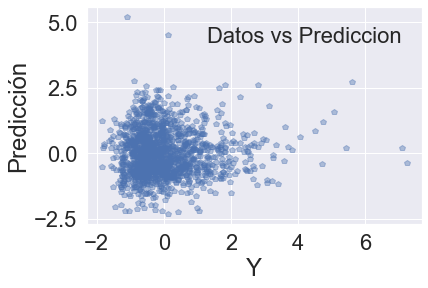

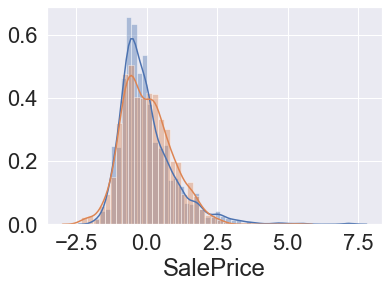

In [100]:
# Regresión lineal múltiple
# Datos de las variables
testrlm = PruebaS.loc[:,['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','YearBuilt','Fireplaces']]
#modelo lineal
lineal1.fit(datosln,Y)
# predicción
yest1=lineal1.predict(testrlm)
plt.plot(Y[1:1460],yest1,'p', label='Datos vs Prediccion', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('Y')
plt.ylabel('Predicción')
plt.show()

sns.distplot(Y)
sns.distplot(yest1)

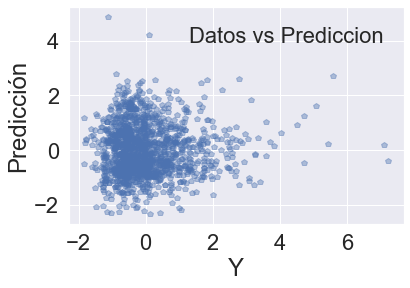

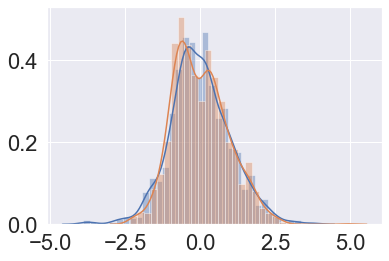

In [101]:
lineal1.fit(datosln,Yln)
yest2=lineal1.predict(testrlm)
plt.plot(Y[1:1460],yest2,'p', label='Datos vs Prediccion', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('Y')
plt.ylabel('Predicción')
plt.show()

sns.distplot(Yln)
sns.distplot(yest2)

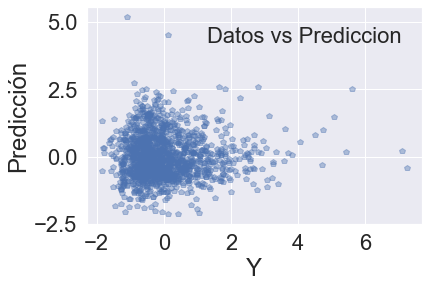

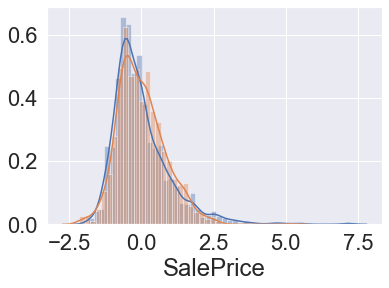

In [102]:
# Regresión Lasso
lasso_model3.fit(datosnum1,Y)
yest3=lasso_model3.predict(PruebaS)
plt.plot(Y[1:1460],yest3,'p', label='Datos vs Prediccion', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('Y')
plt.ylabel('Predicción')
plt.show()

sns.distplot(Y)
sns.distplot(yest3)

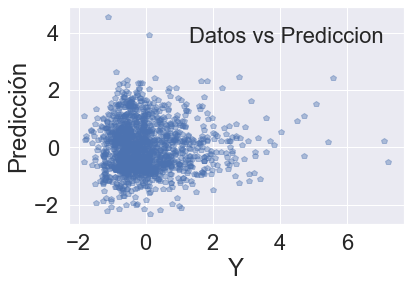

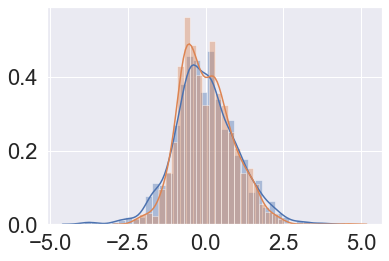

In [103]:
# Regresión Lasso
lasso_model3.fit(datosnum1,Yln)
yest4=lasso_model3.predict(PruebaS)
plt.plot(Y[1:1460],yest4,'p', label='Datos vs Prediccion', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('Y')
plt.ylabel('Predicción')
plt.show()

sns.distplot(Yln)
sns.distplot(yest4)

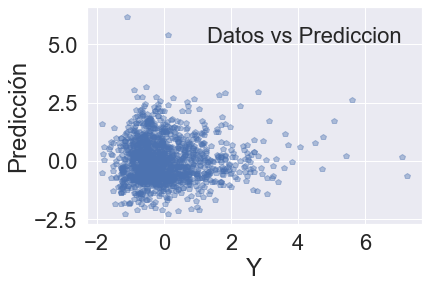

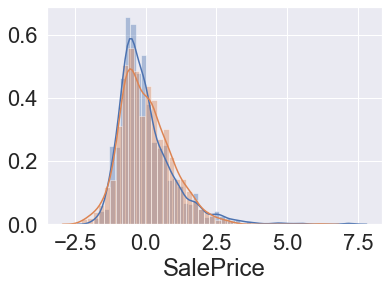

In [104]:
# Regresión Ridge
ridge_model1.fit(datosnum1,Y)
yest5=ridge_model1.predict(PruebaS)
plt.plot(Y[1:1460],yest5,'p', label='Datos vs Prediccion', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('Y')
plt.ylabel('Predicción')
plt.show()

sns.distplot(Y)
sns.distplot(yest5)

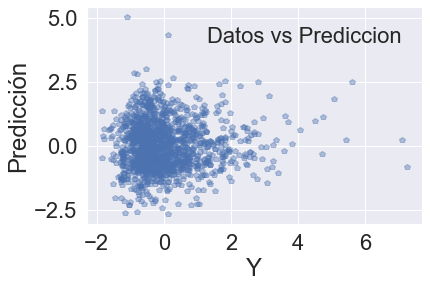

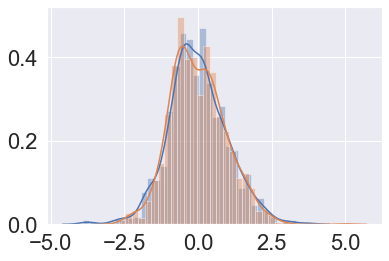

In [105]:
# Regresión Ridge
ridge_model1.fit(datosnum1,Yln)
yest6=ridge_model1.predict(PruebaS)
plt.plot(Y[1:1460],yest6,'p', label='Datos vs Prediccion', alpha=0.4)
plt.legend(loc='best', frameon=False)
plt.xlabel('Y')
plt.ylabel('Predicción')
plt.show()
sns.distplot(Yln)
sns.distplot(yest6)

## 5. Conclusiones.
La base de datos que utilizamos para hacer el ajuste del modelo tiene mediciones de diferentes variables que pueden ser de interes, ya que inicialmente pueden afectar el precio de una casa, como lo es el área de construcción, el área del terreno, el número de cuartos, baños, cocinas, garages, entre otras, pero hay factores externos que pueden alterar drasticamente el precio de una casa, como lo es su localización o los servicios que tienen el inmueble, por lo tanto, no es tan sencillo predecir el precio de una casa.

Con forme a nuestro análsis podemos pensar que las variables que alteran (al menos de forma lineal) al precio de una casa son: el material con el que se hacen los acabados a la construcción, la superficia habitable, la capacidad del garage, el área destinada para el sótano, la antiguedad de la casa y el numero de chimeneas.

En terminos generales, si solo usamos al modelo que tiene directamente al precio de las casas, entonces tenemos un modelo relativamente bueno cuando hablamos de estimar precios inferiores a 400,000 dolares, ya cuando el precio aumenta, entonces tenemos un modelo un tanto deficiente ya que subestima el precio de algunas casas (lujosas), pero si ajustamos al modelo la variable del logaritmo del precio, entonces la situación cambia, pues mejora su rendimiento.

Cuando comparamos los modelos en la parte del test notamos que tenemos variabilidad entorno a la identidad y que los modelos pese a no ser exactamente los mismos, si guardan cierta similitud entre sí y nos dan estimaciones parecidas.

En la etapa de prueba, podemos ver que las densidades de las predicciones contra los datos son muy similares, pero necesitariamos metodos un poco más robustos para validar su desempeño (por ejemplo validación cruzada).

Pese a no ser un modelo perfecto, podemos decir que fue bueno nuestro primer acercamiento, ya que si logramos capturar algo de la tendencia de nuestros datos.

Una siguiente etapa sería meter las variables categóricas y posiblemente meter modelos más generales.